In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from IPython.display import display

In [19]:
model = Sequential()

**CIFAR10 small image classification**
Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

* **X_train, X_test**: uint8 array of RGB image data with shape (nb_samples, 3, 32, 32).
* **y_train, y_test**: uint8 array of category labels (integers in range 0-9) with shape (nb_samples,).


In [27]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
display(X_train.shape)
display(y_test.shape)
display(type(X_train))

(50000, 32, 32, 3)

(10000, 1)

numpy.ndarray

dummy data ...

In [3]:
import numpy as np
X_train = np.random.random((200, 100))
Y_train = np.random.random((200, 10))
X_batch = np.random.random((5, 100))
Y_batch = np.random.random((5, 10))
X_test = np.random.random((50, 100))
Y_test = np.random.random((50, 10))

Stacking model layers via `.add()`:

In [20]:
model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu", name="relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax", name="softmax"))

configure model learning process with `.compile()`:

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

configure optimizer

In [21]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

visualize

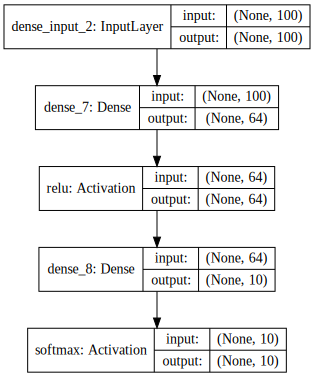

In [22]:
# from keras.utils.visualize_util import plot
# plot(model, to_file='model.png', show_shapes=True)
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

iterate training data in batches:

In [17]:
model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)

Epoch 1/5
200/200 [==============================] - 0s - loss: 11.9710     
Epoch 2/5
200/200 [==============================] - 0s - loss: 11.8235     
Epoch 3/5
200/200 [==============================] - 0s - loss: 11.7739     
Epoch 4/5
200/200 [==============================] - 0s - loss: 11.7442     
Epoch 5/5
200/200 [==============================] - 0s - loss: 11.7250     


Alternatively, manually feed batches to model:

In [20]:
model.train_on_batch(X_batch, Y_batch)

13.393109

Evaluate model performance:

In [22]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

32/50 [==================>...........] - ETA: 0s

generate predictions on new data:

In [23]:
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)

32/50 [==================>...........] - ETA: 0s

# Some Techniques

## onehot encoding

In [10]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
Y = ['Car', 'Boat', 'Plane']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
one_hot = np_utils.to_categorical(encoded_Y)
print(one_hot)

[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]


## Sequence matrix gen from sequence array

In [6]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mappings
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
seq_length = 5
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
    seq_in = alphabet[i:i + seq_length]
    seq_out = alphabet[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    print (seq_in, '->', seq_out)

ABCDE -> F
BCDEF -> G
CDEFG -> H
DEFGH -> I
EFGHI -> J
FGHIJ -> K
GHIJK -> L
HIJKL -> M
IJKLM -> N
JKLMN -> O
KLMNO -> P
LMNOP -> Q
MNOPQ -> R
NOPQR -> S
OPQRS -> T
PQRST -> U
QRSTU -> V
RSTUV -> W
STUVW -> X
TUVWX -> Y
UVWXY -> Z


In [16]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

d = [112, 118,132,129, 121, 135]

create_dataset(d, 2)

(array([[112, 118],
        [118, 132],
        [132, 129]]), array([132, 129, 121]))